In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [3]:
# 设置参数
rnn_unit = 10    
input_size = 7
output_size = 1
lr=0.0006        

In [4]:
# 导入数据
f = open(r'stock_data2.csv') 
# 读入股票数据
df = pd.read_csv(f)            
# 取第3-10列
data = df.iloc[:,2:10].values
df.iloc[:,2:10]

,open,close,low,high,volume,money,change,label
0,104.30,104.39,99.98,104.39,1.970000e+05,8.500000e+04,0.044109,109.13
1,109.07,109.13,103.73,109.13,2.800000e+04,1.610000e+04,0.045407,114.55
2,113.57,114.55,109.13,114.55,3.200000e+04,3.110000e+04,0.049666,120.25
3,120.09,120.25,114.55,120.25,1.500000e+04,6.500000e+03,0.049760,125.27
4,125.27,125.27,120.25,125.27,1.000000e+05,5.370000e+04,0.041746,125.28
5,125.27,125.28,125.27,125.28,6.600000e+04,1.046000e+05,0.000080,126.45
6,126.39,126.45,125.28,126.45,1.080000e+05,8.800000e+04,0.009339,127.61
7,126.56,127.61,126.48,127.61,7.800000e+04,6.000000e+04,0.009174,128.84
8,127.61,128.84,127.61,128.84,9.100000e+04,5.910000e+04,0.009639,130.14
9,128.84,130.14,128.84,130.14,1.410000e+05,9.390000e+04,0.010090,131.44


In [5]:
# 获取训练集

def get_train_data(batch_size=60,time_step=20,train_begin=0,train_end=5800):
    
    batch_index = []
    data_train = data[train_begin:train_end]
    # 标准化
    normalized_train_data = (data_train-np.mean(data_train,axis=0))/np.std(data_train,axis=0)  
    
    # 训练集 
    train_x,train_y = [],[]  
    
    for i in range(len(normalized_train_data)-time_step):
       if i % batch_size==0:
           batch_index.append(i)
       x = normalized_train_data[i:i+time_step,:7]
       y = normalized_train_data[i:i+time_step,7,np.newaxis]
       train_x.append(x.tolist())
       train_y.append(y.tolist())
    batch_index.append((len(normalized_train_data)-time_step))
    return batch_index,train_x,train_y

In [6]:
# 获取测试集

def get_test_data(time_step=20,test_begin=5800):
    
    data_test = data[test_begin:]
    mean = np.mean(data_test,axis=0)
    std = np.std(data_test,axis=0)
    normalized_test_data = (data_test-mean)/std  #标准化
    size = (len(normalized_test_data) + time_step-1)//time_step  #有size个sample 
    test_x,test_y = [],[]  
    
    for i in range(size-1):
       x = normalized_test_data[i*time_step:(i+1)*time_step,:7]
       y = normalized_test_data[i*time_step:(i+1)*time_step,7]
       test_x.append(x.tolist())
       test_y.extend(y)
    test_x.append((normalized_test_data[(i+1)*time_step:,:7]).tolist())
    test_y.extend((normalized_test_data[(i+1)*time_step:,7]).tolist())
    return mean,std,test_x,test_y

In [7]:
# 定义变量: 输入层、输出层权重、偏置

weights = {
         'in':tf.Variable(tf.random_normal([input_size,rnn_unit])),
         'out':tf.Variable(tf.random_normal([rnn_unit,1]))
        }


biases = {
        'in':tf.Variable(tf.constant(0.1,shape=[rnn_unit,])),
        'out':tf.Variable(tf.constant(0.1,shape=[1,]))
       }

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# 定义LSTM模型

def lstm(X):     
    batch_size = tf.shape(X)[0]
    time_step = tf.shape(X)[1]
    w_in = weights['in']
    b_in = biases['in']  
    
    # 将x转成2维作为隐层输入
    input = tf.reshape(X,[-1,input_size])  
    input_rnn = tf.matmul(input,w_in)+b_in
    
    # 将input_rnn转成3维作为lstm cell的输入
    input_rnn = tf.reshape(input_rnn,[-1,time_step,rnn_unit])  
    cell = tf.nn.rnn_cell.BasicLSTMCell(rnn_unit)
    init_state = cell.zero_state(batch_size,dtype=tf.float32)
    
    # output_rnn记录lstm每个输出节点的结果，final_states是最后一个cell的结果
    output_rnn,final_states = tf.nn.dynamic_rnn(cell, input_rnn,initial_state=init_state, dtype=tf.float32)  
   
    # 输出层的输入
    output = tf.reshape(output_rnn,[-1,rnn_unit]) 
    w_out = weights['out']
    b_out = biases['out']
    pred = tf.matmul(output,w_out) + b_out
    return pred, final_states

In [14]:
# 训练模型

def train_lstm(batch_size=80,time_step=15,train_begin=2000,train_end=5800):

    X = tf.placeholder(tf.float32, shape=[None,time_step,input_size])
    Y = tf.placeholder(tf.float32, shape=[None,time_step,output_size])
    batch_index,train_x,train_y = get_train_data(batch_size,time_step,train_begin,train_end)
    pred,_ = lstm(X)

    # 损失函数
    loss = tf.reduce_mean(tf.square(tf.reshape(pred,[-1])-tf.reshape(Y, [-1])))
    train_op = tf.train.AdamOptimizer(lr).minimize(loss)
    # module_file = tf.train.latest_checkpoint()    
    saver = tf.train.Saver(tf.global_variables(),max_to_keep=15)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        # saver.restore(sess, "model/stock2.model")
        
        # 重复训练10000次
        for i in range(10000):
            for step in range(len(batch_index)-1):
                _,loss_ = sess.run([train_op,loss],feed_dict={X:train_x[batch_index[step]:batch_index[step+1]],Y:train_y[batch_index[step]:batch_index[step+1]]})
            print(i,loss_)
        print("保存模型：",saver.save(sess,'model/stock2.model'))                 

with tf.variable_scope('train2'):  
    train_lstm()

KeyboardInterrupt: 

INFO:tensorflow:Restoring parameters from model/stock2.model


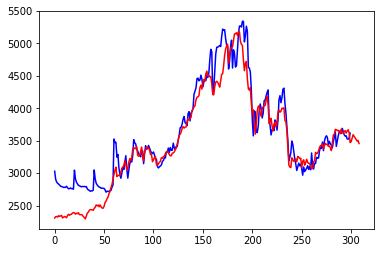

In [16]:
# 预测模型

def prediction(time_step=20):
    
    X = tf.placeholder(tf.float32, shape=[None,time_step,input_size])
    # Y = tf.placeholder(tf.float32, shape=[None,time_step,output_size])
    mean,std,test_x,test_y = get_test_data(time_step)
    pred,_ = lstm(X)     
    saver = tf.train.Saver(tf.global_variables())
    with tf.Session() as sess:
        # 参数恢复
        # module_file = tf.train.latest_checkpoint()
        saver.restore(sess, 'model/stock2.model') 
        test_predict = []
        for step in range(len(test_x)-1):
          prob = sess.run(pred,feed_dict={X:[test_x[step]]})   
          predict = prob.reshape((-1))
          test_predict.extend(predict)
        test_y = np.array(test_y) * std[7] + mean[7]
        test_predict = np.array(test_predict) * std[7] + mean[7]
        acc = np.average(np.abs(test_predict-test_y[:len(test_predict)])/test_y[:len(test_predict)]) 
        
        # 可视化结果
        plt.plot(list(range(len(test_predict))), test_predict, color='b')
        plt.plot(list(range(len(test_y))), test_y,  color='r')
        plt.show()
        
with tf.variable_scope('train2',reuse=True):  
    prediction()